## Q1

### Create the following data set for Experience and Salary in CSV. Applying SLR, explore the relationship between salary and experience with exerience in x-axis and salary in y axis.

### a.
### Check for various values of beta (slope) = 0.1, 1.5, and 0.8 with a fixed value of intercept i.e b=1.1. Plot the graph between beta and mean squared error(MSE) for each case.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = {
    "experience" : [1.2, 1.5, 1.9, 2.2, 2.4, 2.5, 2.8, 3.1, 3.3, 3.7, 4.2, 4.4],
    "salary" : [1.7, 2.4, 2.3, 3.1, 3.7, 4.2, 4.4, 6.1, 5.4, 5.7, 6.4, 6.2]
}
df = pd.DataFrame(data)
df.to_csv('salary.csv', index=False)
df

,experience,salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,2.4,3.7
5,2.5,4.2
6,2.8,4.4
7,3.1,6.1
8,3.3,5.4
9,3.7,5.7


In [4]:
n = len(df)
X = df['experience']
y = df['salary']

x_mean = np.mean(X)
y_mean = np.mean(y)

b1 = (np.sum((X-x_mean)*(y-y_mean)))/np.sum((X-x_mean)**2)
b0 = y_mean-x_mean*b1

print("b0: ", b0)
print("b1: ", b1)

b0:  -0.03563861094761833
b1:  1.5670982931135966


In [5]:
y_pred = b0 + b1*X
error = y-y_pred
y_pred_df = pd.DataFrame({'X': X, 'y': y, 'y_pred': y_pred, 'error': y-y_pred})
y_pred_df

,X,y,y_pred,error
0,1.2,1.7,1.844879,-0.144879
1,1.5,2.4,2.315009,0.084991
2,1.9,2.3,2.941848,-0.641848
3,2.2,3.1,3.411978,-0.311978
4,2.4,3.7,3.725397,-0.025397
5,2.5,4.2,3.882107,0.317893
6,2.8,4.4,4.352237,0.047763
7,3.1,6.1,4.822366,1.277634
8,3.3,5.4,5.135786,0.264214
9,3.7,5.7,5.762625,-0.062625


In [6]:
MSE = np.sum(error**2)/n
RMSE = np.sqrt(MSE)

print("MSE: ", MSE)
print("RMSE: ", RMSE)

MSE:  0.23366710810280555
RMSE:  0.48339125778483577


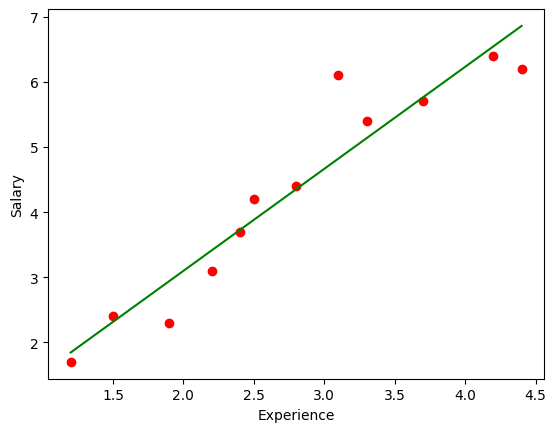

In [7]:
plt.plot(X, y_pred, color='green')
plt.scatter(X, y, color='red')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

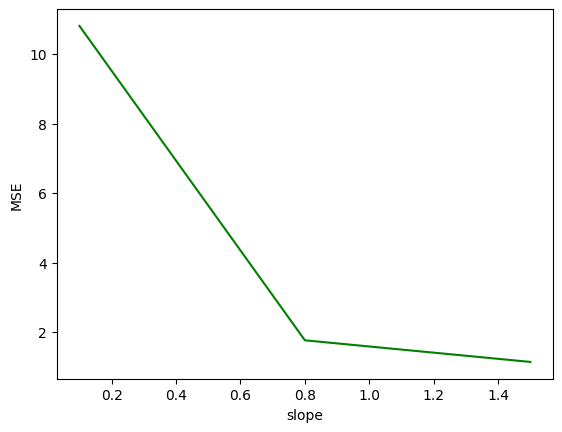

In [9]:
intercept = 1.1
slope = [0.1, 0.8, 1.5]
MSE_varied=[]
least_mse= 0

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    mse_new = np.sum((y-y_pred_new)**2/n)
    MSE_varied.append(mse_new)
    if mse_new<least_mse:
        least_mse = mse_new
        best_slope = slope[i]

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

### b.
### Try with beta between 0 to 1.5 with an increment of 0.01 keeping b (intercept) as constant and Plot the graph between beta and mean squared error(MSE).

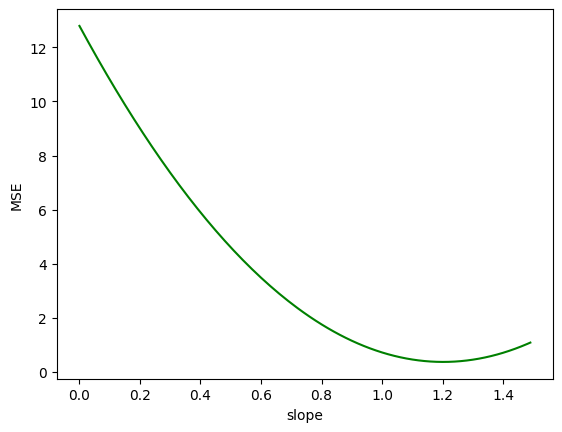

Best slope 1.2
Least MSE:  0.3752666666666666
Intercept:  0.9799999999999995


In [20]:
intercept = 1.1
slope = np.arange(0, 1.5, 0.01)
MSE_varied=[]
least_mse = 10**5
best_slope = 0

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    mse_new = np.sum((y-y_pred_new)**2/n)
    MSE_varied.append(mse_new)
    if mse_new<least_mse:
        least_mse = mse_new
        best_slope = slope[i]

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

print("Best slope", best_slope)
print("Least MSE: ", least_mse)
print("Intercept: ", y_mean-x_mean*best_slope)

### c.
### Try with different values of intercept for slope beta between 0 to 1.5 with an increment of 0.01. Plot the graph between beta and mean squared error(MSE).

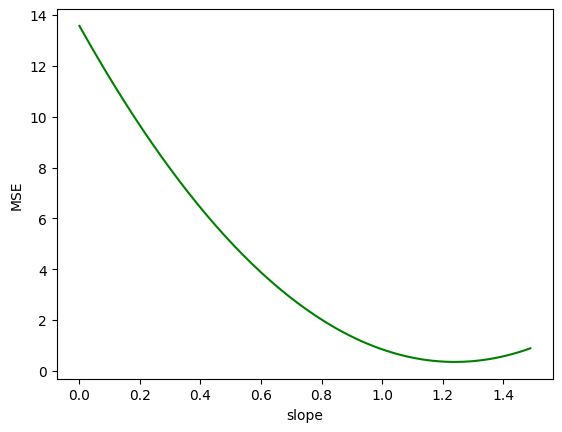

In [21]:
intercept = y_mean-x_mean*best_slope
slope = np.arange(0, 1.5, 0.01)
MSE_varied=[]

for i in range(len(slope)):
    y_pred_new = intercept + slope[i]*X
    MSE_varied.append(np.sum((y-y_pred_new)**2/n))

plt.plot(slope, MSE_varied, color='green')
plt.xlabel("slope")
plt.ylabel("MSE")
plt.show()

### d.
### Use the scikit learn and compare the results of MSE.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

X = df[['experience']].values
X = df[['salary']].values

model.fit(X, y)

Sb0 = model.intercept_
Sb1 = model.coef_[0]

mse = mean_squared_error(y, y_pred)

print(f"b0: {Sb0}")
print(f"b1: {Sb1}")
print(f"MSE: {mse}")

b0: -0.6796211626387976
b1: 0.27433050293925526
MSE: 45.49612223402874


## Q2

Final parameters: b0 = 9.251858538542978e-21, b1 = 0.02588010415864912


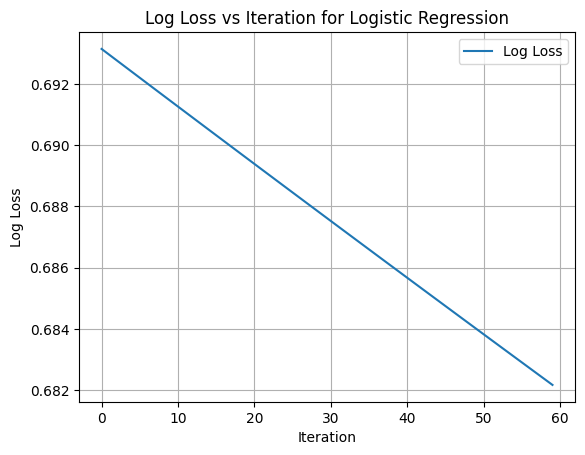

In [51]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred_prob):
    epsilon = 1e-10 
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
X = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 

mean_X = X.mean()
std_X = X.std()
X_normalized = (X - mean_X) / std_X

b0 = 0.0
b1 = 0.0
learning_rate = 0.001
iterations = 60

log_loss_list = []

for iteration in range(iterations):
    z = b0 + b1 * X_normalized
    predictions = sigmoid(z)
    
    log_loss = compute_log_loss(y, predictions)
    log_loss_list.append(log_loss)
    
    error = predictions - y
    gradient_b0 = np.mean(error)
    gradient_b1 = np.mean(error * X_normalized)
    
    b0 -= learning_rate * gradient_b0
    b1 -= learning_rate * gradient_b1

print(f"Final parameters: b0 = {b0}, b1 = {b1}")

plt.plot(range(iterations), log_loss_list, label='Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Iteration for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Predicted probability for input value 1.4 using sklearn: 0.9046822686200048
Log Loss using sklearn: 0.2713815455130057


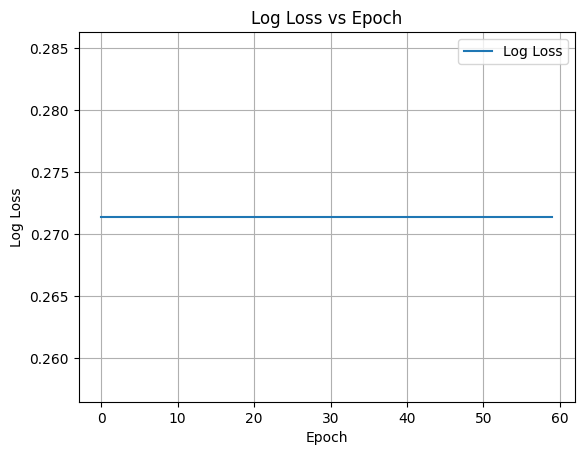

In [55]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression

X = X.reshape(-1, 1)
# y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 

mean_X = X.mean()
std_X = X.std()
X_normalized = (X - mean_X) / std_X

model = LogisticRegression(solver='liblinear') 
model.fit(X_normalized.reshape(-1, 1), y)

predicted_prob = model.predict_proba([[1.4]])[0, 1] 
print(f"Predicted probability for input value 1.4 using sklearn: {predicted_prob}")

y_pred_prob = model.predict_proba(X_normalized.reshape(-1, 1))[:, 1]

log_loss_value = log_loss(y, y_pred_prob)
print(f"Log Loss using sklearn: {log_loss_value}")

log_loss_list = [log_loss_value] * 60  

plt.plot(range(len(log_loss_list)), log_loss_list, label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

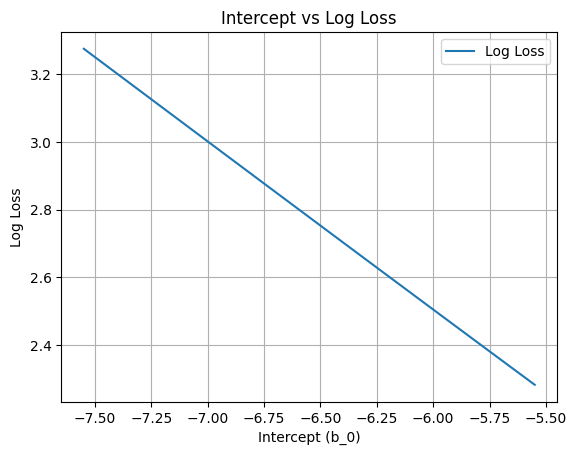

In [57]:
X = X.reshape(-1, 1) 
# y = 0,0,0,0,0,0,1,1,1,1,1,1
model = LogisticRegression()
model.fit(X, y)

original_intercept = model.intercept_

intercept_values = np.linspace(original_intercept - 1, original_intercept + 1, 100)
log_losses = []

for intercept_val in intercept_values:
    y_pred = model.predict(X) + intercept_val
    # y_pred_prob = 1 / (1 + np.exp(-y_pred)) 
    y_pred_prob = sigmoid(y_pred)  
    log_loss_value = log_loss(y, y_pred_prob)
    log_losses.append(log_loss_value)


plt.plot(intercept_values, log_losses, label='Log Loss')
plt.xlabel('Intercept (b_0)')
plt.ylabel('Log Loss')
plt.title('Intercept vs Log Loss')
plt.legend()
plt.grid(True)
plt.show()

## Q3

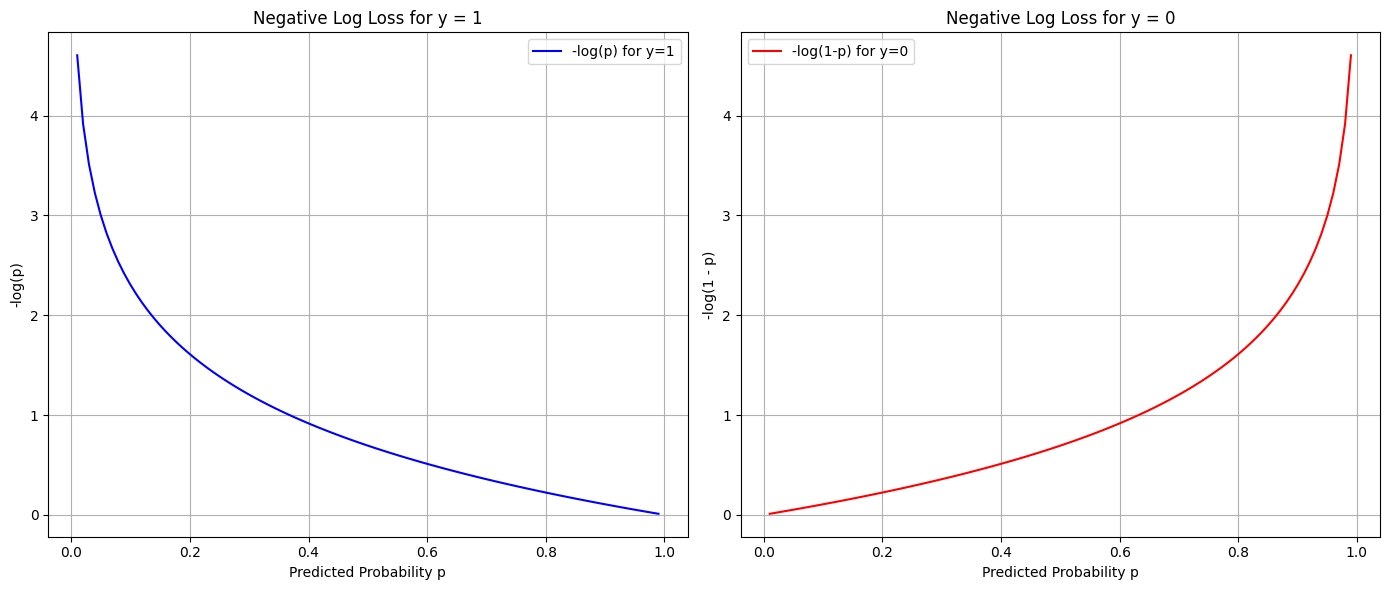

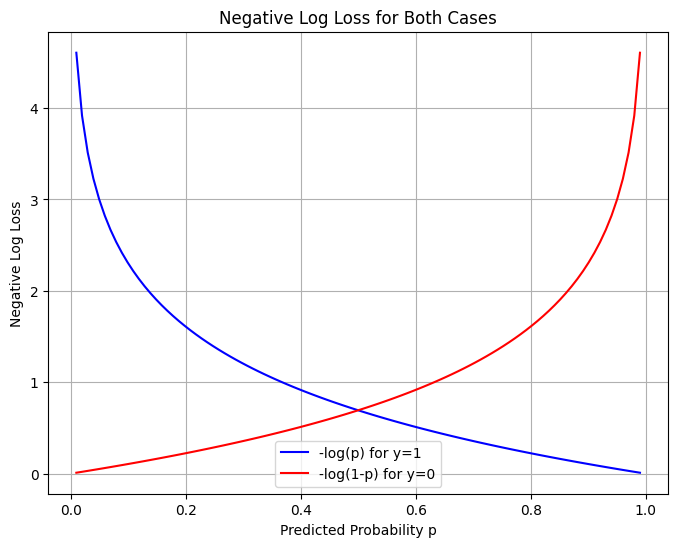

In [53]:
p = np.linspace(0.01, 0.99, 100) 

neg_log_p = -np.log(p) 
neg_log_1_minus_p = -np.log(1 - p) 

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(p, neg_log_p, label='-log(p) for y=1', color='blue')
plt.xlabel('Predicted Probability p')
plt.ylabel('-log(p)')
plt.title('Negative Log Loss for y = 1')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p, neg_log_1_minus_p, label='-log(1-p) for y=0', color='red')
plt.xlabel('Predicted Probability p')
plt.ylabel('-log(1 - p)')
plt.title('Negative Log Loss for y = 0')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(p, neg_log_p, label='-log(p) for y=1', color='blue')
plt.plot(p, neg_log_1_minus_p, label='-log(1-p) for y=0', color='red')
plt.xlabel('Predicted Probability p')
plt.ylabel('Negative Log Loss')
plt.title('Negative Log Loss for Both Cases')
plt.legend()
plt.grid(True)
plt.show()

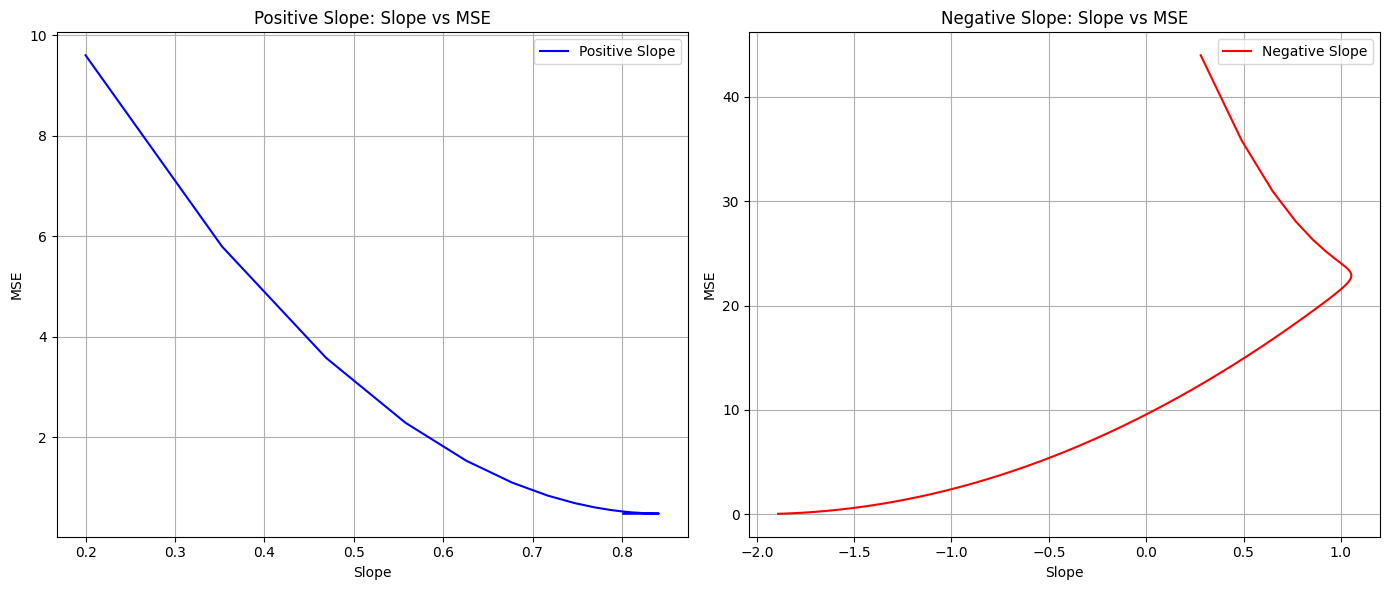

In [59]:
def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(x)  
    slope = 0
    intercept = 0
    slope_history = []
    mse_history = []
    
    for _ in range(iterations):
        y_pred = slope * x + intercept

        mse = np.mean((y - y_pred) ** 2)
        mse_history.append(mse)
        
        slope_gradient = -2* np.sum(x * (y - y_pred)) / m
        intercept_gradient = -2* np.sum(y - y_pred) / m
        
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        slope_history.append(slope)
    
    return slope_history, mse_history

x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

slope_pos, mse_pos = gradient_descent(x_pos, y_pos)
slope_neg, mse_neg = gradient_descent(x_neg, y_neg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_pos, mse_pos, label='Positive Slope', color='blue')
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('Positive Slope: Slope vs MSE')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(slope_neg, mse_neg, label='Negative Slope', color='red')
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('Negative Slope: Slope vs MSE')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## Q4

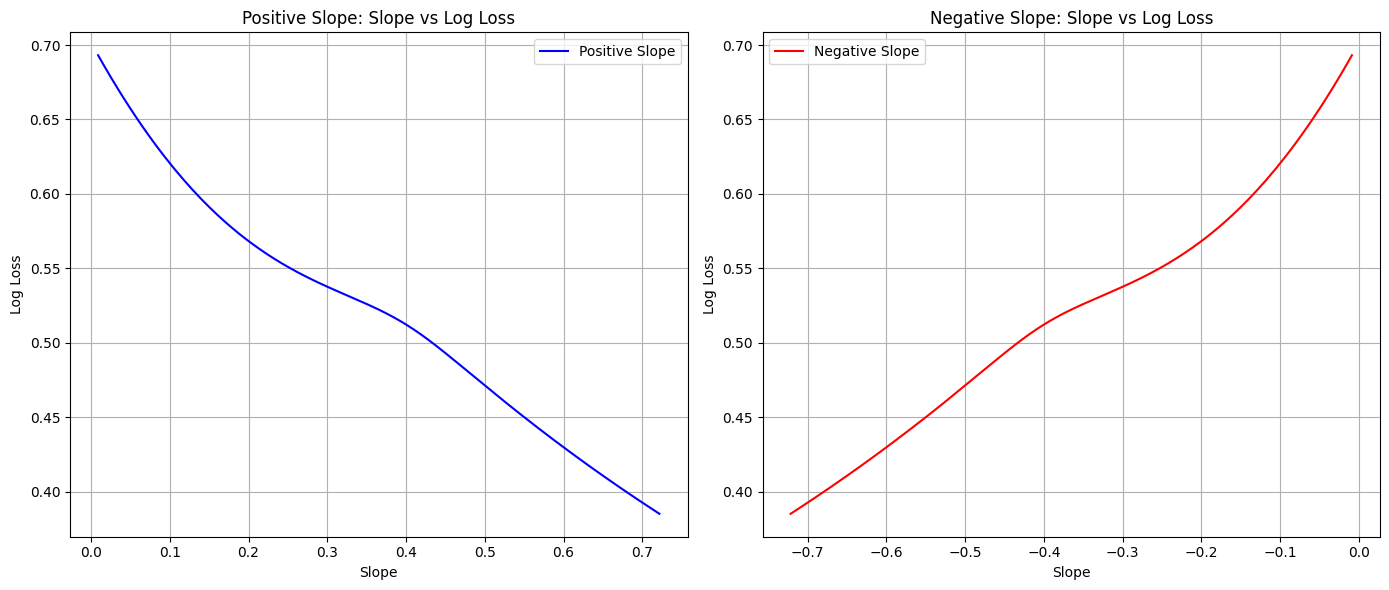

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred_prob):
    epsilon = 1e-15
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

def gradient_descent_logistic(x, y, learning_rate=0.01, iterations=1000):
    m = len(x)  
    slope = 0
    intercept = 0
    slope_history = []
    log_loss_history = []
    
    x = x.reshape(-1, 1) 
    X = np.hstack([x, np.ones_like(x)])
    
    for _ in range(iterations):
        z = X @ np.array([slope, intercept])
        y_pred_prob = sigmoid(z)
        
        log_loss_value = compute_log_loss(y, y_pred_prob)
        log_loss_history.append(log_loss_value)
        error = y_pred_prob - y
        slope_gradient = np.dot(X[:, 0], error) / m
        intercept_gradient = np.sum(error) / m
        
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        slope_history.append(slope)
    
    return slope_history, log_loss_history

x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])

slope_pos, log_loss_pos = gradient_descent_logistic(x_pos, y_pos)
slope_neg, log_loss_neg = gradient_descent_logistic(x_neg, y_neg)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_pos, log_loss_pos, label='Positive Slope', color='blue')
plt.xlabel('Slope')
plt.ylabel('Log Loss')
plt.title('Positive Slope: Slope vs Log Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(slope_neg, log_loss_neg, label='Negative Slope', color='red')
plt.xlabel('Slope')
plt.ylabel('Log Loss')
plt.title('Negative Slope: Slope vs Log Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()